Task 1: (3 marks) Perform Monte Carlo simulations to make the corresponding plot for theheat capacity, i.e. plot CV/kN vs. temperature with J/k=0.5K, and compare to corresponding analytical solution. What is the effect of decreasing the coupling energy and why?








[0.23500371 0.27301246 0.30764544 0.3386151  0.36572381 0.38886235
 0.40800532 0.42320391 0.43457683 0.44229992 0.44659519 0.44771984
 0.44595563 0.44159918 0.43495316 0.42631886 0.41598985 0.40424712
 0.39135519 0.37755953 0.36308478 0.34813392 0.33288807 0.31750684
 0.30212913 0.28687425 0.2718432  0.25712015 0.24277397 0.22885971
 0.21542017 0.20248732 0.19008364 0.17822346 0.16691407 0.15615681
 0.14594804 0.13628    0.12714155 0.11851888 0.11039605 0.10275551
 0.09557858 0.08884576 0.08253708 0.07663235 0.0711114  0.06595425
 0.06114125 0.05665321 0.05247148 0.04857804 0.04495553 0.04158731
 0.03845745 0.03555078 0.03285288 0.03035005 0.02802933 0.02587849
 0.02388597 0.02204091 0.02033308 0.01875288 0.01729132 0.01593995
 0.0146909  0.01353679 0.01247072 0.01148628 0.01057747 0.00973872
 0.00896482 0.00825095 0.0075926  0.0069856  0.00642608 0.00591043
 0.00543532 0.00499765 0.00459454 0.00422335 0.0038816  0.00356703
 0.00327751 0.0030111  0.002766   0.00254054 0.00233317 0.0021

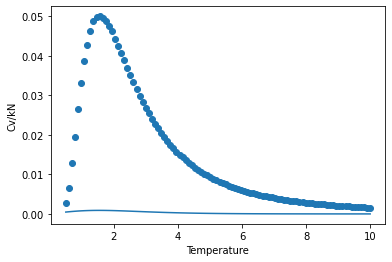

In [42]:

import matplotlib.pyplot as plt
import random
import math
import numpy as np


N = 500 # N sites
L = N*2000 # 2000 calcs / site
J = 1 # positive J is ferromagnet
k = 1.0 # Boltzmann const, in a.u.

temps = np.linspace(0.5, 10.0, 100) # generate 100 temperatures from 0.1 to 10.0
Cv_values = []

for T in temps:
    rand = random.randint(1,N) # initial distribution
    for i in range(N):
        spin[i]=-1
    Enrg = -J*N # all spins aligned initially
    tot_Enrg = 0
    tot_Enrg2 = 0
    P = math.exp(-4.0*J/(k*T)) # prob’lty in Metropolis test.

    for num in range(L): # start Metropolis
        i = rand # choose spin at random
        indx1 = i+1
        if indx1 > N:
            indx1 = 1
        indx2 = i-1
        if indx2 < 0:
            indx2 = N - 1
        DeltaE = 2*J*spin[i]*(spin[indx1] + spin[indx2])
        # Metropolis test
        if DeltaE <= 0 or random.random() < P: # rand between 0 and 1
            spin[i] = -spin[i] # flip spin
            Enrg += DeltaE # add in energy
            tot_Enrg += Enrg
            tot_Enrg2 += Enrg**2

    avE = tot_Enrg/L # total <E > , N sites
    avE2 = tot_Enrg2/L # total <E2> , N sites
    Cv = 1/(k*T**2)*(avE2 - avE**2)/N # specific heat per spin
    Cv_values.append(Cv)

# plot Cv values against temperature
    
CV_theo_values = k*((0.5*temps))*(1/np.cosh(0.5*temps))**(2)
print(CV_theo_values)
plt.scatter(temps, np.array(Cv_values)/(k*N))
plt.xlabel("Temperature")
plt.ylabel("Cv/kN")

plt.plot(temps, CV_theo_values/(k*N))
plt.xlabel("Temperature")
plt.ylabel("Cv/kN")
plt.show()



decreasing the coupling energy in a 1D Ising system can cause a transition from a ferromagnetic phase to a paramagnetic phase. This phase transition occurs when the coupling energy is strong, the energy of the system is minimized, when all of the spins are aligned in the same direction. However, as the coupling energy is reduced, the energy of the system becomes more and more sensitive to the orientation of individual spins.

Task 2:Calculate the entropy S for a given J value at five different temperatures

In [9]:
import random
import math

random.seed() # start random number generator
N = 500 # N sites
L = N*2000 # 2000 calcs / site
J = 1.0 # positive J is ferromagnet
k = 1.0 # Boltzmann const, in a.u.

# Define temperature range and step
T_list = [1.0, 2.0, 3.0, 4.0, 5.0]

for T in T_list:
    rand = random.randint(1,N) # initial distribution
    for i in range(N):
        spin[i]=-1
    Enrg = -J*N # all spins aligned initially
    tot_Enrg = 0
    tot_Enrg2 = 0
    energy_counts=[0]*N
    P = math.exp(-4.0*J/(k*T)) # prob’lty in Metropolis test.

    for num in range(L): # start Metropolis
        i = rand # choose spin at random
        indx1 = i+1
        if indx1 > N:
            indx1 = 1
        indx2 = i-1
        if indx2 < 0:
            indx2 = N - 1
        DeltaE = 2*J*spin[i]*(spin[indx1] + spin[indx2])
        # Metropolis test
        if DeltaE <= 0 or random.random() < P: # rand between 0 and 1
            spin[i] = -spin[i] # flip spin
            Enrg += DeltaE # add in energy
            tot_Enrg += Enrg
            tot_Enrg2 += Enrg**2
            energy_counts[int(Enrg + N)] += 1
    avE = tot_Enrg/L # total <E > , N sites
    avE2 = tot_Enrg2/L # total <E2> , N sites

       
    # Compute the probability distribution
    energy_prob = [c/L for c in energy_counts]

    # Compute the entropy S using the probability distribution
    S = -k*sum([p*math.log(p) if p > 0 else 0 for p in energy_prob])
    print(f"At T = {T:.2f}, the entropy is {S:.2f}")

    


At T = 1.00, the entropy is 0.14
At T = 2.00, the entropy is 0.51
At T = 3.00, the entropy is 0.65
At T = 4.00, the entropy is 0.71
At T = 5.00, the entropy is 0.73


b)Plot the results in a graph as shown in Figure 8B (including theoretical and Monte Carlo data)

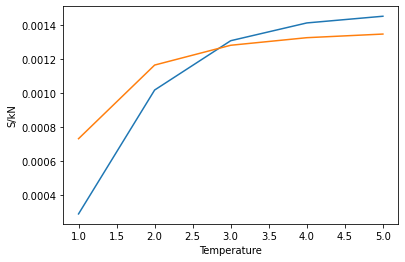

In [22]:
import random
import math
import matplotlib.pyplot as plt


N = 500 # N sites
L = N*2000 # 2000 calcs / site
J = 1.0 # positive J is ferromagnet
k = 1.0 # Boltzmann const, in a.u.
p = 1
# Define temperature range and step
T_list =np.array([1.0, 2.0, 3.0, 4.0, 5.0], dtype=float)
entropy_array=[]

for T in T_list:
    rand = random.randint(1,N) # initial distribution
    spin = [-1]*N
    Enrg = -J*N # all spins aligned initially
    tot_Enrg = 0
    tot_Enrg2 = 0
    energy_counts=[0]*N
    P = math.exp(-4.0*J/(k*T)) # probabilty in Metropolis test.
    for num in range(L): # start Metropolis
        i = rand # choose spin at random
        indx1 = i+1
        if indx1 > N:
            indx1 = 0
        indx2 = i-1
        if indx2 < 0:
            indx2 = N - 1
        DeltaE = 2*J*spin[i]*(spin[indx1] + spin[indx2])
        # Metropolis test
        if DeltaE <= 0 or random.random() < P: # rand between 0 and 1
            spin[i] = -spin[i] # flip spin
            Enrg += DeltaE # add in energy
            tot_Enrg += Enrg
            tot_Enrg2 += Enrg**2
            energy_counts[int(Enrg + N)] += 1
            
    avE = tot_Enrg/L # total <E > , N sites
    avE2 = tot_Enrg2/L # total <E2> , N sites
    # Compute the number of configurations
    # Count the number of groups of up and down spins
    for i in range(1, N):
        if spin[i] != spin[i-1]:
            p += 1

    energy_prob = [c/L for c in energy_counts]

    # Compute the entropy S using the probability distribution
   
    # Compute the Monte Carlo entropy using the probability distribution
    S_mc = -k*sum([p*math.log(p) if p > 0 else 0 for p in energy_prob])
    entropy_array.append(S_mc)
 

S=k*np.log(np.exp(2*J/(k*T_list))+1)-((2*J)/T_list)*np.exp(2*J/(k*T_list))/(np.exp(2*J/(k*T_list))+1)

plt.plot(T_list, np.array(entropy_array)/(k*N))
plt.xlabel("Temperature")
plt.ylabel("S/kN")
plt.legend()
     
    
plt.plot(T_list, S/(k*N))
plt.xlabel("Temperature")
plt.ylabel("S/kN")
plt.legend()
plt.show()


    

Explain the results for the entropy in the limits when T -> zero and T -> infinity

When T approaches 0 the energy levels of the system are at their lowest and the spin states are ordered. Beacause of the low energy there is very few possibilities that the spin states can be in. This means as T tends to 0 so does the entropy. As T tend to infinity the entropy is maximised as all particles have super high energies and the dissorder of the system reaches a maximum

Derive/calculate theoretically expressions for U, CV, and S in the limit of J = 0 and in the presence of a magnetic field B and depict their T dependence assuming convenient values for the parameter.

<ipython-input-44-1c423736e681>:13: RuntimeWarning: invalid value encountered in log
  S_values = k*np.log((np.exp(2*J/(k*T_values))+1)-2*J/(k*T_values)*np.exp(2*J/(k*T_values)))/(np.exp(2*J/(k*T_values))+1)


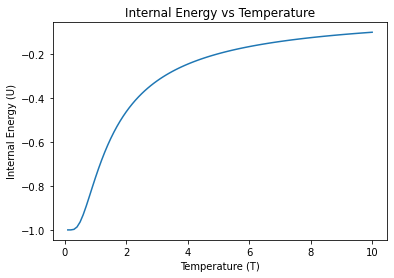

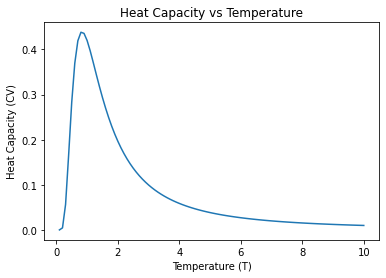

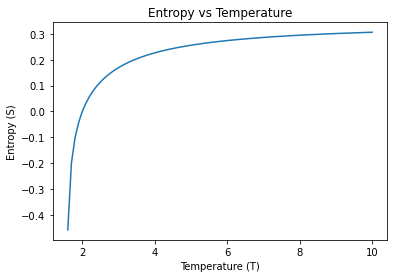

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
J = 1.0 # exchange energy
k = 1.0 # Boltzmann constant
B = 1.0 # magnetic field

# Calculate U, CV, and S for a range of temperature values
T_values = np.linspace(0.1, 10, 100)
U_values = -J*np.tanh(J/(k*T_values))
CV_values = k*((J/(k*T_values))*(1/np.cosh((J/(k*T_values)))))**(2)
S_values = k*np.log((np.exp(2*J/(k*T_values))+1)-2*J/(k*T_values)*np.exp(2*J/(k*T_values)))/(np.exp(2*J/(k*T_values))+1)

# Plot U vs T
plt.plot(T_values, U_values)
plt.xlabel('Temperature (T)')
plt.ylabel('Internal Energy (U)')
plt.title('Internal Energy vs Temperature')
plt.show()

# Plot CV vs T
plt.plot(T_values, CV_values)
plt.xlabel('Temperature (T)')
plt.ylabel('Heat Capacity (CV)')
plt.title('Heat Capacity vs Temperature')
plt.show()

# Plot S vs T
plt.plot(T_values, S_values)
plt.xlabel('Temperature (T)')
plt.ylabel('Entropy (S)')
plt.title('Entropy vs Temperature')
plt.show()


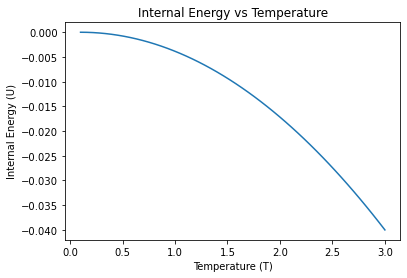

"plt.plot(T_values, entropy_values)\nplt.xlabel('Temperature (T)')\nplt.ylabel('Entropy (S)')\nplt.title('Entropy vs Temperature')\nplt.show()"

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
kB = 1.0        # Boltzmann's constant
J = 0.0         # Interaction energy
N = 100         # Number of spins
B = 2  # Magnetic field values
T_values = np.linspace(0.1, 3, 50) # Temperature values


mag_values=magnetisation(B_values,T_values)
# Calculate internal energy
def internal_energy(B, T):
    beta = 1.0 / (kB * T)
    U = -B * B
    return U / N
energy_values=internal_energy(B_values,T_values)
# Calculate entropy
def entropy(B, T):
    S = kB * np.log(2)
    return S
entropy_values=entropy(B_values,T_values)

plt.plot(T_values, energy_values)
plt.xlabel('Temperature (T)')
plt.ylabel('Internal Energy (U)')
plt.title('Internal Energy vs Temperature')
plt.show()

# Plot CV vs T
'''plt.plot(T_values, CV_values)
plt.xlabel('Temperature (T)')
plt.ylabel('Heat Capacity (CV)')
plt.title('Heat Capacity vs Temperature')
plt.show()'''

# Plot S vs T
'''plt.plot(T_values, entropy_values)
plt.xlabel('Temperature (T)')
plt.ylabel('Entropy (S)')
plt.title('Entropy vs Temperature')
plt.show()'''


Self Assessment
Question 1) I think i correcly found the theoretical or monte carlo values as the shape is correct however my values are not on the same magnitude and i dont know why

question 2a) I think i successfully completed this task
question 2b) again the shape i have between my theoretical and monte carlo is similar however the values are incorrect
question 2c) I think i explained this correctly

question 3a) I know i attempted this question wrong to start with not realising it says to define them when J=0 when i realised i tried to fix it however I did not have enough time to complete it
Question 3b) similarly I did not have time to do this question.